# GMAG Colab DASP Tutorial

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kylermurphy/DASP_2024/blob/main/GMAG/GMAG_DASP_colab.ipynb)

## Colab Intro

This is a [Google Colab](https://colab.research.google.com/) Notebook containing the the DASP GMAG tutorial.

This Colab Notebook can be ran fully in your browser without the need to install a Python distribution.

The first few cells of this notebook are slightly different then the Notebook on the GitHub page as the installation of the GMAG module on Colab is slightly differnt then a local install.

**Note** - if Colab idles for too long it will disconnect and you'll have to restart the session and remove the gmag directory using ```!rm /content/gmag -r``` in a new coding cell.

The next few cells walk you through the inital installation.


In [1]:
# clone the GMAG GitHub repositor
# '!' allows you to run commands from the command line

!git clone https://github.com/kylermurphy/gmag.git

Cloning into 'gmag'...
remote: Enumerating objects: 1090, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1090 (delta 79), reused 96 (delta 47), pack-reused 949
Receiving objects: 100% (1090/1090), 3.41 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (663/663), done.


Once the GMAG repository is cloned it will show up as a new directory ```gmag``` in the ```Files``` tab on the left. Here you can access the entire package (as well as the docs) and can navigate through the code as you like.

We can also edit the ```gmagrc_example``` file so that we can download magnetometer data within the Colab Notebook.

This can all be down through Colab using ```!``` to access the command line.



In [2]:
# copy the gmagrc_example file to gmagrc
!cp /content/gmag/gmag/gmagrc_example /content/gmag/gmag/gmagrc


In [3]:
# append the data_dir variable to the new gmagrc file
!echo data_dir = /content/sample_data >> /content/gmag/gmag/gmagrc

This will now allow you to download magnetometer data to ```sample_data``` directory. This will not download data to computer but is rather stored on the Colab hosted Virtural Maching (the machine running the Notebook).

You can also edit the ```gmagrc_example``` file in Colab.

- In the ```Files``` tab on the left navigate to ```gmag\gmag\```.
- Right click on the ```gmagrc_example``` file and rename it ```gmagrc```.
- In the ```Files``` tab right click on the ```sample_data``` directory and select ```copy_path```
- Open the ```gmagrc``` file by double clicking (it should open in an editor on the left of your browser).
- On line 9 edit the ```data_dir``` variable by pasting the path of the ```sample_data``` directory.
  - ```data_dir = /content/sample_data```
- Save and close ```gmagrc``` (```ctrl-s``` on windows)

Now we can install GMAG or rather add it to the Python path as installing is a bit difficult. Note, Colab Notebooks have all the necessary requirements to run GMAG without having to install additional packages (e.g., those identified as required in ```setup.py```)




In [4]:
# import sys and add the local gmag path
# to the Python system path

import sys
sys.path.insert(1, '/content/gmag')

print("\n".join(["'" + path + "'" for path in sys.path]))

'/content'
'/content/gmag'
'/env/python'
'/usr/lib/python310.zip'
'/usr/lib/python3.10'
'/usr/lib/python3.10/lib-dynload'
''
'/usr/local/lib/python3.10/dist-packages'
'/usr/lib/python3/dist-packages'
'/usr/local/lib/python3.10/dist-packages/IPython/extensions'
'/root/.ipython'


Check if we can load GMAG

In [5]:
import gmag.config as config

config_path = config.get_config_file()
print(f'Path to the gmag config file: {config_path}')


Path to the gmag config file: /content/gmag/gmag/gmagrc


## Start of the DASP GMAG Tutorial

# GMAG

```gmag``` is an open-source Python library which provides rapid access to ground-based magnetometer data from several array in a common data format.

- [GMAG paper](https://www.frontiersin.org/articles/10.3389/fspas.2022.1005061/full)
- [GMAG Website/Docs](https://kylermurphy.github.io/gmag/)
- [GMAG repository](https://github.com/kylermurphy/gmag)

Why magnetometers?
- Their a unique data set in Heliophysics
 - One of the few [globally distributed data sets](https://kylermurphy.github.io/gmag/stations)
 - One of the few [long term data sets](https://doi.org/10.1016/j.jastp.2011.02.018) - span multiple solar cycles
- They can probe various ionosphere and magnetosphere phenomena
 - [Radiation belts](https://doi.org/10.1038/nphys3799)
 - [Aurora](https://doi.org/10.1002/2013JA018889)
 - [Substorms](https://doi.org/10.1002/2013JA018979)
 - [ULF waves](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005JA011007)

Why was ```gmag``` developed?
- I wanted to take advantage of global magnetometer measurements for both case studies and statistical studies.
  - required code to read data from multiple providers into a common data format
- I wanted access to cool Python code.
- I wanted to move away from IDL (expensive, falling behind or at the very least trailing very far).

Why ```gmag``` when other resources exist?
- GMAG downloads data from the source which can provide **upto date** and **higher cadence** data
- GMAG is **light weight**
- GMAG uses **Pandas DataFrames which work well within the Python framework** and with analysis (numpy, scipy), plotting (matplotlib, seaborn), and machine learnging (sck-kit learn) packages.

## Loading Data

```gmag``` is primarily for loading data. Though it will also load station and array meta data, rotate the data into geomagnetic coordinates, and do some very basic cleaning of the data.

**Lets load plot some CARISMA data.**




In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# Plot multi-panel plot of the H compoment
# magnetic field for select CARSIMA stations

# import required modules
import gmag.arrays.carisma as carisma

# define start and end date for loading
# assume a single day is loaded
sdate = '2014-11-05 13:25:00'
edate = '2014-11-05 14:25:00'

stn = ['PINA','ISLL','GILL','FCHU','RANK']

# load the data and meta data
car_dat, car_meta=carisma.load(stn,sdate)


Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105PINA.F01.gz
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105ISLL.F01.gz
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105GILL.F01.gz
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105FCHU.F01.gz
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105RANK.F01.gz


**Lets have a look at the data**

In [8]:
car_dat
car_meta

,PINA_X,PINA_Y,PINA_Z,ISLL_X,ISLL_Y,ISLL_Z,GILL_X,GILL_Y,GILL_Z,FCHU_X,...,PINA_H,PINA_D,ISLL_H,ISLL_D,GILL_H,GILL_D,FCHU_H,FCHU_D,RANK_H,RANK_D
t,,,,,,,,,,,,,,,,,,,,,
2014-11-05 00:00:00,15441.216,292.359,56111.766,11899.259,45.491,58181.737,11152.466,-344.534,58748.691,9347.341,...,15440.926007,-307.293641,11899.340380,-11.519572,11154.712948,-261.879007,9346.982155,167.764230,6829.527110,-186.596039
2014-11-05 00:00:01,15441.203,292.303,56111.834,11899.356,45.375,58181.703,11152.681,-344.719,58748.472,9347.316,...,15440.910843,-307.349094,11899.436823,-11.636035,11154.929313,-262.062409,9346.959185,167.703424,6829.552632,-186.624211
2014-11-05 00:00:02,15441.306,292.334,56111.869,11899.447,45.400,58181.719,11153.306,-344.506,58748.519,9347.291,...,15441.014969,-307.322116,11899.527942,-11.611472,11155.552717,-261.844783,9346.935779,167.655611,6829.647127,-186.673349
2014-11-05 00:00:03,15441.269,292.269,56111.928,11899.612,45.491,58181.675,11153.409,-344.644,58748.306,9347.291,...,15440.975473,-307.385631,11899.693376,-11.521263,11155.656737,-261.982016,9346.937761,167.596644,6829.631979,-186.630846
2014-11-05 00:00:04,15441.453,292.344,56111.894,11899.872,45.516,58181.541,11153.234,-344.853,58747.900,9347.288,...,15441.162246,-307.317830,11899.953493,-11.497509,11155.483290,-262.192307,9346.938661,167.480609,6829.565205,-186.729463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-05 23:59:55,15443.019,294.528,56098.306,11880.700,44.703,58153.378,11112.913,-360.181,58713.459,9253.531,...,15442.811849,-305.196269,11880.777818,-12.218646,11115.276986,-277.818686,9254.498564,126.736386,6887.346476,-138.450794
2014-11-05 23:59:56,15443.059,294.613,56098.322,11880.647,44.719,58153.363,11112.688,-360.275,58713.559,9253.428,...,15442.855119,-305.112886,11880.724895,-12.202392,11115.052689,-277.914351,9254.395219,126.744918,6887.237568,-138.542359
2014-11-05 23:59:57,15443.078,294.641,56098.319,11880.619,44.722,58153.353,11112.572,-360.281,58713.603,9253.328,...,15442.875192,-305.085644,11880.696910,-12.199258,11114.936736,-277.921210,9254.294838,126.754550,6887.144191,-138.629047


,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year,Time Resolution,Coordinates,PI,Institution
0,CARISMA,PINA,Pinawa,50.199,263.96,59.73356,332.8985,2.224797,3.936418,7.025832,16.97417,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
1,CARISMA,ISLL,Island Lake,53.856,265.34,63.32252,334.5638,0.274508,4.961003,6.914816,17.08518,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
2,CARISMA,GILL,Gillam,56.376,265.36,65.70992,334.3131,-0.424595,5.909671,6.931526,17.06847,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
3,CARISMA,FCHU,Fort Churchill,58.763,265.92,67.98832,334.8558,-1.925641,7.118868,6.895347,17.10465,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
4,CARISMA,RANK,Rankin Inlet,62.824,267.89,71.86144,337.3598,-6.812278,10.318030,6.728414,17.27159,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta


```gmag``` loads the raw data, rotates it (if required), and also loads the station metadata.

The metadata stores the array and station code, station coordinates, cadence, the data coordinates, PI and Institution.

## Accessing Data

The data and metadata are loaded in a [Pandas DataFrame](https://pandas.pydata.org/docs/index.html).
- [10 minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html#)
- [Pandas DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)
- [Get Item](https://pandas.pydata.org/docs/user_guide/10min.html#getitem)
- [Selection by label](https://pandas.pydata.org/docs/user_guide/10min.html#selection-by-label)
- [Selection by position](https://pandas.pydata.org/docs/user_guide/10min.html#selection-by-position)
- [Boolean Indexing](https://pandas.pydata.org/docs/user_guide/10min.html#boolean-indexing) & [masking](https://pandas.pydata.org/docs/user_guide/indexing.html#the-where-method-and-masking)



In [9]:
# Get Item
# Accessing by label/column name
car_dat['PINA_H']
car_dat[['PINA_H','PINA_D']]

# Accessing by location, still require labels
car_dat.loc['2014-11-05 01:00:00','GILL_D']

# Accessing by position, like an array

car_dat.iloc[:,-3:-1]

# note the index here is a DateTime object
# to make it more like an array reset the index
car_dat.reset_index().iloc[0:10,0:2]

t
2014-11-05 00:00:00    15440.926007
2014-11-05 00:00:01    15440.910843
2014-11-05 00:00:02    15441.014969
2014-11-05 00:00:03    15440.975473
2014-11-05 00:00:04    15441.162246
                           ...     
2014-11-05 23:59:55    15442.811849
2014-11-05 23:59:56    15442.855119
2014-11-05 23:59:57    15442.875192
2014-11-05 23:59:58    15442.878189
2014-11-05 23:59:59    15442.886271
Name: PINA_H, Length: 86400, dtype: float64

,PINA_H,PINA_D
t,,
2014-11-05 00:00:00,15440.926007,-307.293641
2014-11-05 00:00:01,15440.910843,-307.349094
2014-11-05 00:00:02,15441.014969,-307.322116
2014-11-05 00:00:03,15440.975473,-307.385631
2014-11-05 00:00:04,15441.162246,-307.317830
...,...,...
2014-11-05 23:59:55,15442.811849,-305.196269
2014-11-05 23:59:56,15442.855119,-305.112886
2014-11-05 23:59:57,15442.875192,-305.085644


-249.52631775800728

,FCHU_D,RANK_H
t,,
2014-11-05 00:00:00,167.764230,6829.527110
2014-11-05 00:00:01,167.703424,6829.552632
2014-11-05 00:00:02,167.655611,6829.647127
2014-11-05 00:00:03,167.596644,6829.631979
2014-11-05 00:00:04,167.480609,6829.565205
...,...,...
2014-11-05 23:59:55,126.736386,6887.346476
2014-11-05 23:59:56,126.744918,6887.237568
2014-11-05 23:59:57,126.754550,6887.144191


,t,PINA_X
0,2014-11-05 00:00:00,15441.216
1,2014-11-05 00:00:01,15441.203
2,2014-11-05 00:00:02,15441.306
3,2014-11-05 00:00:03,15441.269
4,2014-11-05 00:00:04,15441.453
5,2014-11-05 00:00:05,15441.569
6,2014-11-05 00:00:06,15441.617
7,2014-11-05 00:00:07,15441.474
8,2014-11-05 00:00:08,15441.549
9,2014-11-05 00:00:09,15441.546


In [10]:
# Boolean Indexing
# only get indexed values where
car_meta[car_meta['cgm_latitude']>60]


,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year,Time Resolution,Coordinates,PI,Institution
1,CARISMA,ISLL,Island Lake,53.856,265.34,63.32252,334.5638,0.274508,4.961003,6.914816,17.08518,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
2,CARISMA,GILL,Gillam,56.376,265.36,65.70992,334.3131,-0.424595,5.909671,6.931526,17.06847,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
3,CARISMA,FCHU,Fort Churchill,58.763,265.92,67.98832,334.8558,-1.925641,7.118868,6.895347,17.10465,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
4,CARISMA,RANK,Rankin Inlet,62.824,267.89,71.86144,337.3598,-6.812278,10.318030,6.728414,17.27159,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta


In [11]:
# Masking
# Only print where indexing is true
lat_mask = (car_meta['latitude'] > 53) & (car_meta['latitude'] < 57)
lat_mask
car_meta[lat_mask]

0    False
1     True
2     True
3    False
4    False
Name: latitude, dtype: bool

,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year,Time Resolution,Coordinates,PI,Institution
1,CARISMA,ISLL,Island Lake,53.856,265.34,63.32252,334.5638,0.274508,4.961003,6.914816,17.08518,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta
2,CARISMA,GILL,Gillam,56.376,265.36,65.70992,334.3131,-0.424595,5.909671,6.931526,17.06847,2014,1.0,"Geographic North - X, East - Y, Vertical Down ...",Ian Mann,University of Alberta




```gmag``` can load data from [12 arrays](https://kylermurphy.github.io/gmag/arrays) (just over 200 magnetometer stations). Data from these arrays are loaded using the ```load()``` function from the ```array``` subpackage in 4 different modules.

```python
#array sub modules
import gmag.arrays.carisma as carisma
import gmag.arrays.canopus as canopus
import gmag.arrays.image as image
import gmag.arrays.themis as themis
```

All the load functions have the same basic format

```python
load(site: str = ['GILL'],
         sdate='2010-01-01',
         ndays: int = 1,
         edate=None,
         dl=True,
         force=False):    
```

You can access the doc string for each module using ```?``` or ```help(array.module)```

### In Colab

```?``` is nice as it opens the docstring in panel on your right.

If you're patient you get auto completion too



In [12]:
carisma.load?

### Exercise 1

Try loading CARISMA data from 2018 and 2023.
Do you notice a difference between the two datasets? For simplicity the Gillam station (GILL) on January 1 from each year.

In [13]:
# load GILL data from 2018-01-01 and 2023-01-01

### Solution

In [14]:
d1 = carisma.load('GILL',sdate='2018-01-01')
d2 = carisma.load('GILL',sdate='2023-01-01')

Loading: /content/sample_data/magnetometer/CARISMA/2018/01/01/20180101GILL.F01.gz
Loading: /content/sample_data/magnetometer/CARISMA/2023/01/01/20230101GILL.F01.gz


In [15]:
# note the difference here
# because I used
# d1 = carisma.load('GILL',sdate='2018-01-01')
# the data and metadata are returned as a tuple
# the first element is the data, and second the meta data

d1[0].head()
d2[0].head()

,GILL_X,GILL_Y,GILL_Z,GILL_H,GILL_D
t,,,,,
2018-01-01 00:00:00,11472.044,-403.422,58368.472,11475.758357,-278.411512
2018-01-01 00:00:01,11472.169,-403.381,58368.488,11475.882903,-278.369153
2018-01-01 00:00:02,11472.128,-403.441,58368.484,11475.842559,-278.429596
2018-01-01 00:00:03,11472.237,-403.400,58368.584,11475.951106,-278.387411
2018-01-01 00:00:04,11472.194,-403.491,58368.584,11475.909100,-278.478874


,GILL_X,GILL_Y,GILL_Z
t,,,
2023-01-01 00:00:00,11755.966,-320.953,57916.156
2023-01-01 00:00:01,11756.006,-320.928,57916.091
2023-01-01 00:00:02,11756.078,-320.900,57916.072
2023-01-01 00:00:03,11756.116,-320.862,57916.075
2023-01-01 00:00:04,11756.175,-320.878,57916.038


## Rotating Data

```gmag``` rotates data from geographic North-East-South (X-Y-Z) to geomagnetic North-East-South (H-D-Z) when it can.

This requires the magnetic declination of the stations. geomagnetic coordinates. These are located in text files seperated by year ```gmag/gmag/Stations/xxxx_station_cgm.txt```.

These text files have been generated for 1990-2019 (inclusively) and haven't been generated for the 2020's yet (working progress).

**Data loaded via the ```themis``` module has undergone extensive processing and is typically returned in local geomagnetic coordinates (HDZ) and so is not rotated when loaded.**




### Utilities

The ```utils``` module provides a number of routines to load station and array information including geographic and geomagnetic coordinates of all the stations.

These are useful for identifying magnetometer stations apart of particular array, or physical location.

In [16]:
from gmag import utils

#load geographic data for all stations
all_stn = utils.load_station_geo(param='*')
all_stn.head()


,array,code,name,latitude,longitude
0,CARISMA,ANNA,Ann Arbor,42.417,276.098
1,CARISMA,BACK,Back Lake,57.707,265.794
2,CARISMA,CONT,Contwoyto,65.754,248.750
3,CARISMA,DAWS,Dawson City,64.048,220.890
4,CARISMA,ESKI,Eskimo Point,61.106,265.950


In [17]:
# load geomagnetic data for all stations
# requires a year
all_stn = utils.load_station_coor(param='*',year=2018)
all_stn.tail()

,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year
196,PENGUIN,PG1,Antarctica,-85.501,77.199,-77.00296,33.46160,-101.29720,19.770540,3.016650,20.98335,2018
197,PENGUIN,PG2,Antarctica,-84.419,57.956,-75.70720,39.16653,-80.10275,16.407330,2.636322,21.36368,2018
198,PENGUIN,PG3,Antarctica,-84.810,37.620,-73.98956,36.77553,-60.88156,13.145350,2.795721,21.20428,2018
199,PENGUIN,PG4,Antarctica,-83.340,12.250,-71.28278,36.47860,-36.04743,9.711069,2.815517,21.18448,2018
200,PENGUIN,PG5,Antarctica,-81.960,5.710,-69.90075,37.35450,-29.36081,8.467860,2.757123,21.24288,2018


The ```utils``` functions also return a Pandas DataFrame which can be easily masked to identify key station characteristics.

In [18]:
# print all CARISMA data
car_pos = all_stn['array'] == 'CARISMA'
all_stn[car_pos]

,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year
0,CARISMA,ANNA,Ann Arbor,42.417,276.098,52.33270,351.1969,-6.779744,2.677999,5.834294,18.16571,2018
1,CARISMA,BACK,Back Lake,57.707,265.794,66.73879,335.6834,-1.506411,6.411707,6.868527,17.13147,2018
2,CARISMA,CONT,Contwoyto,65.754,248.750,72.49955,307.9569,13.959950,11.058470,8.716964,15.28304,2018
3,CARISMA,DAWS,Dawson City,64.048,220.890,66.01288,276.6518,19.414440,6.050792,10.803970,13.19603,2018
4,CARISMA,ESKI,Eskimo Point,61.106,265.950,69.91843,335.4670,-3.149248,8.482162,6.882957,17.11704,2018
5,CARISMA,FCHP,Fort Chipewyan,58.769,248.894,65.92288,311.1213,13.478390,6.008310,8.506003,15.49400,2018
6,CARISMA,FCHU,Fort Churchill,58.763,265.920,67.73386,335.7477,-2.039588,6.965134,6.864240,17.13576,2018
7,CARISMA,FSIM,Fort Simpson,61.756,238.770,67.08294,297.1137,18.555080,6.594960,9.439846,14.56015,2018
8,CARISMA,FSMI,Fort Smith,60.017,248.050,66.98434,309.5751,14.148690,6.541616,8.609080,15.39092,2018
9,CARISMA,GILL,Gillam,56.376,265.360,65.46531,335.1785,-0.624243,5.799533,6.902190,17.09781,2018


### Exercise 2

Identify all magnetometer stations around geosynchronous orbit, say 6.25 < L < 6.75.

In [19]:
# put your code here

### Solution

In [20]:
geo = (all_stn['lshell'] > 6.25) & (all_stn['lshell'] < 6.75)
all_stn[geo]

,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year
1,CARISMA,BACK,Back Lake,57.707,265.794,66.73879,335.683400,-1.506411,6.411707,6.868527,17.131470,2018
7,CARISMA,FSIM,Fort Simpson,61.756,238.770,67.08294,297.113700,18.555080,6.594960,9.439846,14.560150,2018
8,CARISMA,FSMI,Fort Smith,60.017,248.050,66.98434,309.575100,14.148690,6.541616,8.609080,15.390920,2018
50,AUTUMNX,INUK,Inukjuak,58.470,281.950,67.21949,0.404359,-17.440280,6.669985,5.220466,18.779530,2018
68,DTU,FHB,Paamiut,62.000,310.320,66.52595,38.133830,-24.078550,6.302398,2.705168,21.294830,2018
94,IMAGE,ALT,Alta,69.860,22.960,67.00389,104.827600,10.523010,6.552136,22.258920,1.741084,2018
95,IMAGE,KEV,Kevo,69.760,27.010,66.76614,108.060500,12.637520,6.425974,22.043390,1.956611,2018
96,IMAGE,TRO,Tromso,69.660,18.940,66.95727,101.444800,8.272039,6.527088,22.484430,1.515565,2018
97,IMAGE,MAS,Masi,69.460,23.700,66.57030,105.156700,10.791870,6.324930,22.236980,1.763021,2018
98,IMAGE,AND,Andenes,69.300,16.030,66.71487,98.856620,6.586174,6.399273,22.656980,1.343018,2018


## Plotting Data

Because ```gmag``` uses Pandas DataFrames plotting is relatively quick and generating nice plots is relatively easy. It even inherently handles time-series plotting quite nicely (formatted time axis).

[Pandas Visualization](https://pandas.pydata.org/docs/user_guide/visualization.html)

[Pandas DataFrame Plotting](https://pandas.pydata.org/docs/reference/frame.html#plotting)

A simple plot

In [21]:
# import required modules
import gmag.arrays.carisma as carisma
import numpy as np
import matplotlib.pyplot as plt

# define start and end date for plotting
# use start date for loading data
sdate = '2014-11-05 13:25:00'
edate = '2014-11-05 14:25:00'

# load data
car_dat, car_meta=carisma.load(['PINA','ISLL','GILL','FCHU','RANK'],sdate)



File 20141105PINA.F01.gz exists use force=True to download
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105PINA.F01.gz
File 20141105ISLL.F01.gz exists use force=True to download
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105ISLL.F01.gz
File 20141105GILL.F01.gz exists use force=True to download
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105GILL.F01.gz
File 20141105FCHU.F01.gz exists use force=True to download
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105FCHU.F01.gz
File 20141105RANK.F01.gz exists use force=True to download
Loading: /content/sample_data/magnetometer/CARISMA/2014/11/05/20141105RANK.F01.gz


<Axes: xlabel='t'>

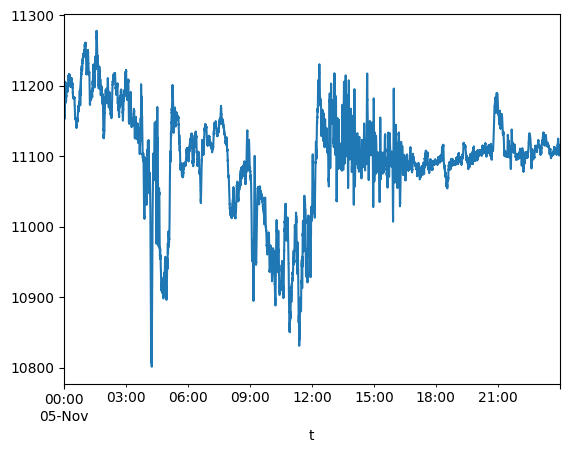

In [22]:
car_dat['GILL_H'].plot()
#car_dat.plot(y=['GILL_H','FCHU_H','ISLL_H','PINA_H'])
#car_dat.plot(y=['GILL_H','FCHU_H','ISLL_H','PINA_H'],subplots=True,ylabel='nT')

A more complex plot

<Axes: xlabel='Time - UT', ylabel='nT'>

Text(0.5, 1.0, '2014-11-05  ULF Wave')

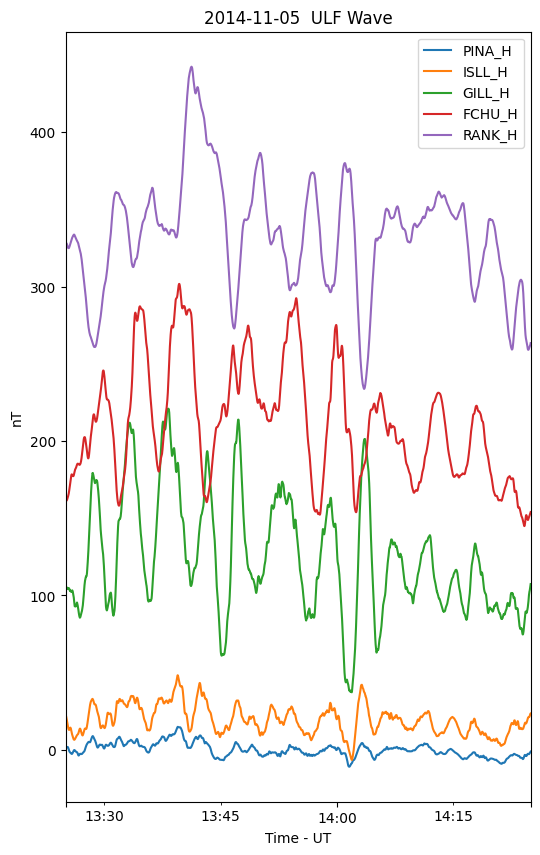

In [23]:
# plot a stacked plot of CARISMA the H component
# magnetic field for stations along the Churchill line

# define component for plotting
comp='H'

# find the columns from the loaded DataFrame that have comp
# in the title, these are the columns that will be plotted
p_col = [col for col in car_dat.columns if col[-1] == comp]

# determine the shift to apply to each time series so that they don't
# overlatp

# the shift is determined using the DataFrame returned by the describe()
# method which stores the DataFrame stats including max and min of each column
# only use columns from p_col and values between the start and end of plotting
# defined by sdate and edate
# the shift in the y direction is defined by 1.5 times the range of the series
y_shift = np.array([(val['max']-val['min'])/1.5 for col_h, val in car_dat[sdate:edate][p_col].describe().items()])

# the cumsum() method determines the cumalitative sum up
# to each index
# the cumsum() ensures timeseries don't overlap
y_shift = (y_shift-y_shift.min()).cumsum()

# plot p_col columns of the data frame between sdate and edate
# subtract the mean from each time series and apply the y-shit
car_dat[sdate:edate][p_col].subtract(car_dat[sdate:edate][p_col].mean()-y_shift).plot(ylabel='nT', xlabel='Time - UT',
                                                            figsize=[6,10])
plt.title(sdate[0:11]+' ULF Wave')

## Analysis

Python offers the widest range of analysis tools for your research and has a huge community to help address problems.

- Basic Anlaysis
  - [Numpy](https://numpy.org/)
  - [SciPy](https://scipy.org/)
- More complex and Machine Learning
  - [Scikit-learn](https://scikit-learn.org/)
  - [Tensor Flow](https://www.tensorflow.org/)
  - [PyTorch](https://pytorch.org/)
  - [Keras](https://keras.io/)
- Heliophysics
  - [PyHC](https://heliopython.org/)
  - [Astropy](https://www.astropy.org/index.html)
  - [Sunpy](https://sunpy.org/)
  - [SpacePy](https://spacepy.github.io/index.html)
  - [pySPEDAS](https://pyspedas.readthedocs.io/en/latest/getting_started.html)
  - [plasmapy](https://docs.plasmapy.org/en/stable/)
  - [pysat](https://pysat.readthedocs.io/en/latest/introduction.html)
  - [AACGM](https://aacgmv2.readthedocs.io/en/latest/)
  - [CDFlib](https://github.com/MAVENSDC/cdflib)
  - [geopack](https://github.com/tsssss/geopack/blob/master/README.md)
  - [IGRF](https://github.com/space-physics/igrf)
  - [PyDarn](https://superdarn.ca/pydarn)

### Filtering

Let try some simple filtering using SciPy (from [Scipy-cookbook](https://scipy-cookbook.readthedocs.io/index.html) and [stackoverflow](https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter))

In [24]:
# import scipy functions
from scipy.signal import butter, sosfilt

# define a bandpass butterwork filter
# low and high cutoff frequencies
# fs sampling rate (same units as )
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

# define and filter the data
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

array([<Axes: xlabel='t', ylabel='nT'>, <Axes: xlabel='t', ylabel='nT'>],
      dtype=object)

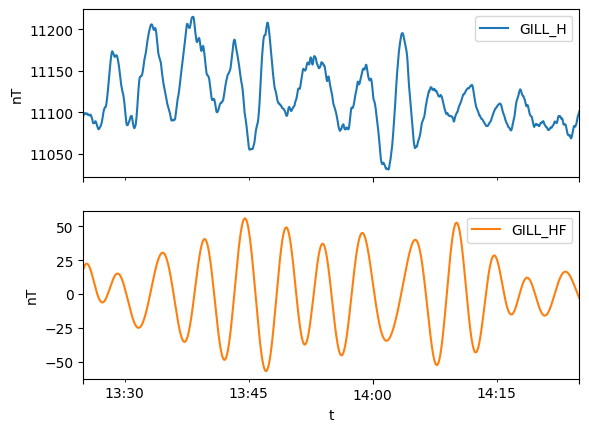

In [25]:
# low and high perios in seconds
# estimated from the figure above
low_period = 250.
high_period = 500.

# low and high frequency cutoffs
lowcut = 1./high_period
highcut = 1./low_period

# sampling frequency
# 1/(Time Resolution)
fs = 1./car_meta[car_meta['code']=='GILL']['Time Resolution']

# Filter the data
f_dat = butter_bandpass_filter(car_dat['GILL_H'], lowcut, highcut, fs,order=5)

# Add the filtered data to our DataFrame
car_dat['GILL_HF'] = f_dat

# Plot the original and filtered data
car_dat[sdate:edate].plot(y=['GILL_H','GILL_HF'],subplots=True,ylabel='nT')



### Exercise 3

Use SciPy to identify the dominant frequency in the ULF wave plotted above. **Hint** use the SciPy periodogram function.

Does the frequency content change as you look at different portions of the day (e.g., if use only data between 13:25-14:25 UT or the entire day)?

### Solution

Maximum Power - 1116315.6180079454
Frequency (mHz) of maximum power - 3.332407664537629
Period (s) of maximum power - 300.0833333333333


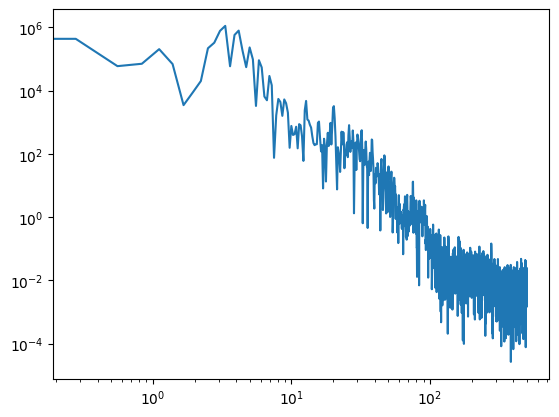

In [26]:
from scipy.signal import periodogram
fs = 1.
fp, p_spec = periodogram(car_dat[sdate:edate]['GILL_H'], fs, scaling='density', detrend='constant', window='hann')

plt.loglog(fp*1000,p_spec)

print(f'Maximum Power - {p_spec.max()}')
print(f'Frequency (mHz) of maximum power - {fp[p_spec.argmax()]*1000.}')
print(f'Period (s) of maximum power - {1/fp[p_spec.argmax()]}')